### Kelompok 1 : Analisis Harga Closing BTC menggunakan model ARIMA dan SARIMA

Jesse laurencia

Victor Georgius W

Tresya Meisel A

Kelvin Harianto

Safires atalla 

In [1]:
#!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

ticker_symbol = 'BTC-USD'
btc_data = yf.Ticker(ticker_symbol)
hist = btc_data.history(period="max")

hist.head()

# Optionally, save the data to a CSV file
#hist.to_csv('bitcoin_data.csv')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


## EDA

In [2]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-17 00:00:00+00:00,65231.296875,67459.460938,65119.316406,67051.875000,28031279310,0.0,0.0
2024-05-18 00:00:00+00:00,67066.210938,67387.328125,66663.500000,66940.804688,16712277406,0.0,0.0
2024-05-19 00:00:00+00:00,66937.929688,67694.296875,65937.179688,66278.367188,19249094538,0.0,0.0
2024-05-20 00:00:00+00:00,66278.742188,71483.562500,66086.171875,71448.195312,43850655717,0.0,0.0
2024-05-21 00:00:00+00:00,71427.992188,71785.109375,70773.343750,71128.812500,57492353024,0.0,0.0


In [3]:
hist.shape

(3535, 7)

In [4]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3535 entries, 2014-09-17 00:00:00+00:00 to 2024-05-21 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3535 non-null   float64
 1   High          3535 non-null   float64
 2   Low           3535 non-null   float64
 3   Close         3535 non-null   float64
 4   Volume        3535 non-null   int64  
 5   Dividends     3535 non-null   float64
 6   Stock Splits  3535 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 220.9 KB


### Cek Stasionaritas dengan ADF

ADF Statistic: -0.460168
p-value: 0.899558
Critical Values:
   1%, -3.4322165414302646
Critical Values:
   5%, -2.8623647321453034
Critical Values:
   10%, -2.5672090191665564


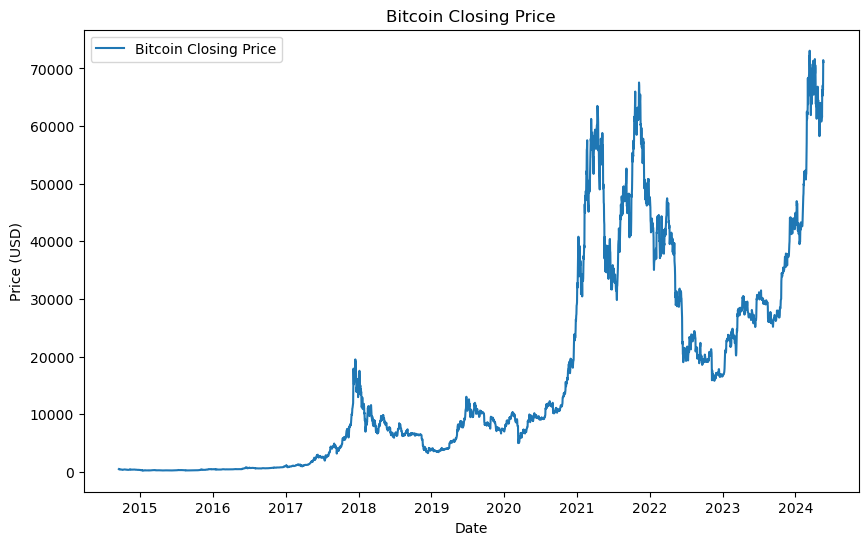

In [5]:
data = hist['Close']

# Perform ADF test
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# Plot the data to visualize trend and seasonality
plt.figure(figsize=(10, 6))
plt.plot(data, label='Bitcoin Closing Price')
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# keterangan p-value 0.84 > 0,05 menandakan hipotesa 0 bahwa nilai tidak stasioner

Karena belum stasioner maka harus differencing data dulu. Seri waktu sering kali memiliki tren atau pola musiman yang membuatnya tidak stasioner. Differencing membantu menghilangkan tren atau pola musiman ini dengan menghitung perbedaan antara nilai-nilai berturut-turut dalam seri waktu.  

In [6]:
# Differencing data
data_diff = data.diff().dropna()

# Perform ADF test on differenced data
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced Data): %f' % result_diff[0])
print('p-value (Differenced Data): %f' % result_diff[1])


#hasil p-value sudah stasioner karena p-value 0 < 0,05

ADF Statistic (Differenced Data): -9.157882
p-value (Differenced Data): 0.000000


### Data Preparation

In [8]:
# Mengecek missing values
missing_values = data.isnull().sum()
print(f'Missing values: {missing_values}')

# Mengisi missing values dengan metode forward fill
data.fillna(method='ffill', inplace=True)

Missing values: 0


In [9]:
#menghitung Simple Moving Average berdasar 20, 50, dan 100 pengamatan terakhir

hist['SMA_20'] = hist['Close'].rolling(window=20).mean()
hist['SMA_50'] = hist['Close'].rolling(window=50).mean()
hist['SMA_100'] = hist['Close'].rolling(window=100).mean()

print(hist[['Close', 'SMA_20', 'SMA_50', 'SMA_100']].tail())

                                  Close        SMA_20        SMA_50  \
Date                                                                  
2024-05-17 00:00:00+00:00  67051.875000  62577.791602  65026.156484   
2024-05-18 00:00:00+00:00  66940.804688  62769.170312  64967.116016   
2024-05-19 00:00:00+00:00  66278.367188  62891.032617  64899.777266   
2024-05-20 00:00:00+00:00  71448.195312  63431.599609  64902.068203   
2024-05-21 00:00:00+00:00  71128.812500  64075.339648  64930.601484   

                                SMA_100  
Date                                     
2024-05-17 00:00:00+00:00  62836.926875  
2024-05-18 00:00:00+00:00  63053.319258  
2024-05-19 00:00:00+00:00  63244.630937  
2024-05-20 00:00:00+00:00  63481.400117  
2024-05-21 00:00:00+00:00  63709.749062  


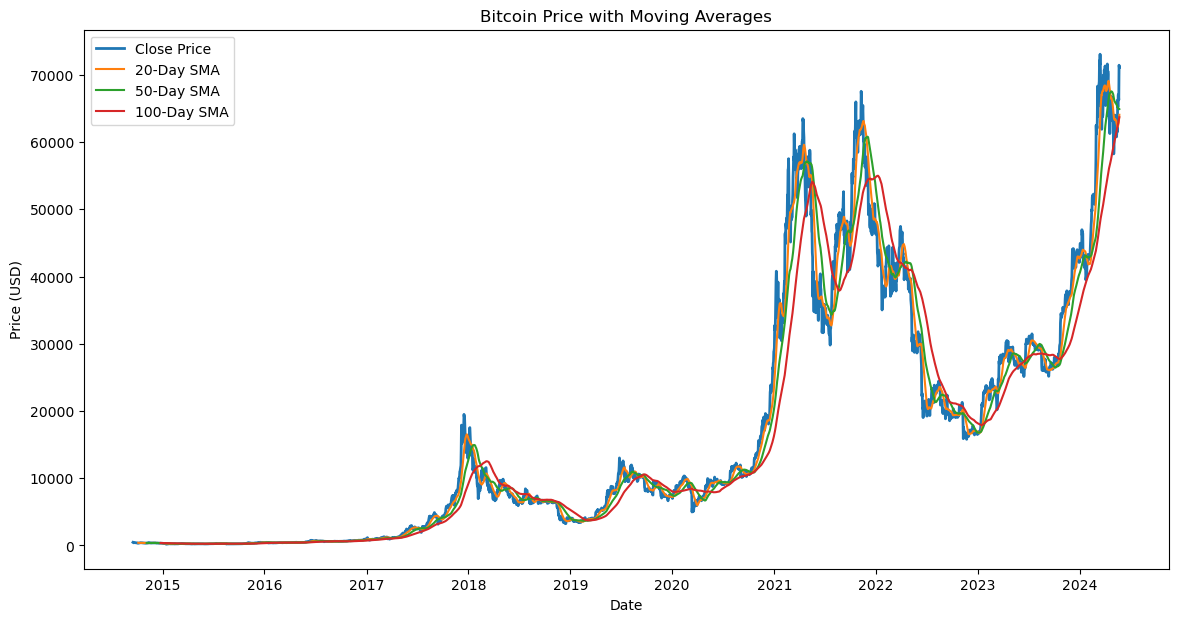

In [10]:
# Plot the closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(hist['Close'], label='Close Price', linewidth=2)
plt.plot(hist['SMA_20'], label='20-Day SMA', linewidth=1.5)
plt.plot(hist['SMA_50'], label='50-Day SMA', linewidth=1.5)
plt.plot(hist['SMA_100'], label='100-Day SMA', linewidth=1.5)

# Add titles and labels
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


##  ---------------------------Pemodelan dengan data yang di normalisasi--------------------------

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
import itertools
warnings.filterwarnings('ignore')

# Fetch data
ticker_symbol = 'BTC-USD'
btc_data = yf.Ticker(ticker_symbol)
hist = btc_data.history(period="max")

# Use the 'Close' column
data = hist['Close']

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))
data_scaled = pd.Series(data_scaled.flatten(), index=data.index)



In [18]:
# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_scaled, test_scaled = data_scaled[:train_size], data_scaled[train_size:]



## Cari parameter terbaik ARIMA

In [19]:
# Define the p, d, and q parameters to take any value between 0 and 4
p = range(0, 5)
d = range(0, 3)
q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Find the best ARIMA model
best_score, best_params = float('inf'), None
for param in pdq:
    try:
        model = ARIMA(train_scaled, order=param)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_scaled))
        mse = mean_squared_error(test_scaled, forecast)
        if mse < best_score:
            best_score, best_params = mse, param
        print(f'ARIMA{param} - MSE: {mse}')
    except:
        continue

print(f'Best ARIMA parameters: {best_params} with MSE: {best_score}')



ARIMA(0, 0, 0) - MSE: 0.11476288800056367
ARIMA(0, 0, 1) - MSE: 0.11473324872932947
ARIMA(0, 0, 2) - MSE: 0.1147014676526786
ARIMA(0, 0, 3) - MSE: 0.11468109817121099
ARIMA(0, 0, 4) - MSE: 0.1146793991335856
ARIMA(0, 1, 0) - MSE: 0.060094598039776875
ARIMA(0, 1, 1) - MSE: 0.060057484072581255
ARIMA(0, 1, 2) - MSE: 0.06013850625172474
ARIMA(0, 1, 3) - MSE: 0.060581487276202835
ARIMA(0, 1, 4) - MSE: 0.06157414977352624
ARIMA(0, 2, 0) - MSE: 3.175546680810761
ARIMA(0, 2, 1) - MSE: 0.10437308546923577
ARIMA(0, 2, 2) - MSE: 0.08798068926294572
ARIMA(0, 2, 3) - MSE: 0.09513545649100186
ARIMA(0, 2, 4) - MSE: 0.11597296959898346
ARIMA(1, 0, 0) - MSE: 0.08175528486149522
ARIMA(1, 0, 1) - MSE: 0.08093075112973451
ARIMA(1, 0, 2) - MSE: 0.08111605077620235
ARIMA(1, 0, 3) - MSE: 0.0821324225436667
ARIMA(1, 0, 4) - MSE: 0.08411383262592276
ARIMA(1, 1, 0) - MSE: 0.06006860625060845
ARIMA(1, 1, 1) - MSE: 0.060082333459775344
ARIMA(1, 1, 2) - MSE: 0.060308658916020955
ARIMA(1, 1, 3) - MSE: 0.0606199609

In [20]:
arima_model = ARIMA(train_scaled, order=best_params)
arima_model_fit = arima_model.fit()

# Print model summary
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2828
Model:                 ARIMA(2, 2, 3)   Log Likelihood                8717.295
Date:                Tue, 21 May 2024   AIC                         -17422.590
Time:                        21:55:35   BIC                         -17386.911
Sample:                    09-17-2014   HQIC                        -17409.718
                         - 06-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7407      0.086    -20.331      0.000      -1.909      -1.573
ar.L2         -0.7903      0.084     -9.439      0.000      -0.954      -0.626
ma.L1          0.7190      0.101      7.146      0.0

### Cari parameter terbaik SARIMA

In [21]:

# Define seasonal p, d, q and m
seasonal_pdq = [(p, d, q, m) for p, d, q, m in itertools.product(range(5), range(3), range(5), [12])]

best_params_non_seasonal2 = best_params  # diambil dari best parameter ARIMA 


# Find the best SARIMA model
best_score, best_params_seasonal = float('inf'), None
for seasonal_param in seasonal_pdq:
    try:
        sarima_model = SARIMAX(train_scaled, order=best_params_non_seasonal2, seasonal_order=seasonal_param)
        sarima_model_fit = sarima_model.fit()
        forecast = sarima_model_fit.forecast(steps=len(test_scaled))
        mse = mean_squared_error(test_scaled, forecast)
        if mse < best_score:
            best_score, best_params_seasonal = mse, seasonal_param
        print(f'SARIMA{seasonal_param} - MSE: {mse}')
    except:
        continue

print(f'Best SARIMA parameters: {best_params_seasonal} with MSE: {best_score}')


SARIMA(0, 0, 0, 12) - MSE: 0.053123957159900585
SARIMA(0, 0, 1, 12) - MSE: 2.3054863493644193
SARIMA(0, 0, 2, 12) - MSE: 3.220305080769164
SARIMA(0, 0, 3, 12) - MSE: 1.06168601294413
SARIMA(0, 0, 4, 12) - MSE: 1.3998795041926704
SARIMA(0, 1, 0, 12) - MSE: 24.64519283543513
SARIMA(0, 1, 1, 12) - MSE: 0.08767569423508353
SARIMA(0, 1, 2, 12) - MSE: 0.07431500459816508
SARIMA(0, 1, 3, 12) - MSE: 5.580577460179331
SARIMA(0, 1, 4, 12) - MSE: 0.4929571889331328
SARIMA(0, 2, 0, 12) - MSE: 12067.727889081458
SARIMA(0, 2, 1, 12) - MSE: 31.86142512444547
SARIMA(0, 2, 2, 12) - MSE: 1.0755614268062927
SARIMA(0, 2, 3, 12) - MSE: 4.6369121033129055
SARIMA(0, 2, 4, 12) - MSE: 0.8321521159048282
SARIMA(1, 0, 0, 12) - MSE: 0.09112586185214382
SARIMA(1, 0, 1, 12) - MSE: 0.07792015737733436
SARIMA(1, 0, 2, 12) - MSE: 1.9166726538160126
SARIMA(1, 0, 3, 12) - MSE: 2.629241941210049
SARIMA(1, 0, 4, 12) - MSE: 2.062844480026175
SARIMA(1, 1, 0, 12) - MSE: 8.033061491113788
SARIMA(1, 1, 1, 12) - MSE: 0.71214658

In [22]:
# Fit SARIMA model with best parameters
sarima_model = SARIMAX(train_scaled, order=best_params_non_seasonal2, seasonal_order=best_params_seasonal)
sarima_model_fit = sarima_model.fit()

print(sarima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2828
Model:               SARIMAX(2, 2, 3)   Log Likelihood                8717.295
Date:                Tue, 21 May 2024   AIC                         -17422.590
Time:                        22:51:50   BIC                         -17386.911
Sample:                    09-17-2014   HQIC                        -17409.718
                         - 06-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7407      0.086    -20.331      0.000      -1.909      -1.573
ar.L2         -0.7903      0.084     -9.439      0.000      -0.954      -0.626
ma.L1          0.7190      0.101      7.146      0.0

### Visualisasi pemodelan ARIMA dan SARIMA 

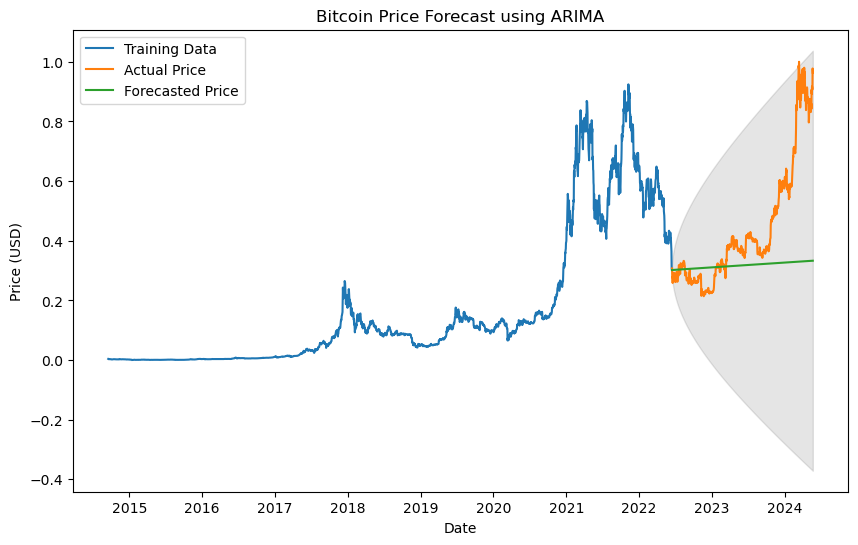

In [23]:
# Forecast the values
forecast3_result = arima_model_fit.get_forecast(steps=len(test_scaled))
forecast3 = forecast3_result.predicted_mean
conf_int = forecast3_result.conf_int()

# Create a series for the forecasted values
forecast3_series = pd.Series(forecast3, index=test_scaled.index)

# Plot the forecast against actual outcomes 
plt.figure(figsize=(10, 6))
plt.plot(train_scaled, label='Training Data')
plt.plot(test_scaled, label='Actual Price')
plt.plot(forecast3_series, label='Forecasted Price')
plt.fill_between(test_scaled.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)  # Confidence interval
plt.title('Bitcoin Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

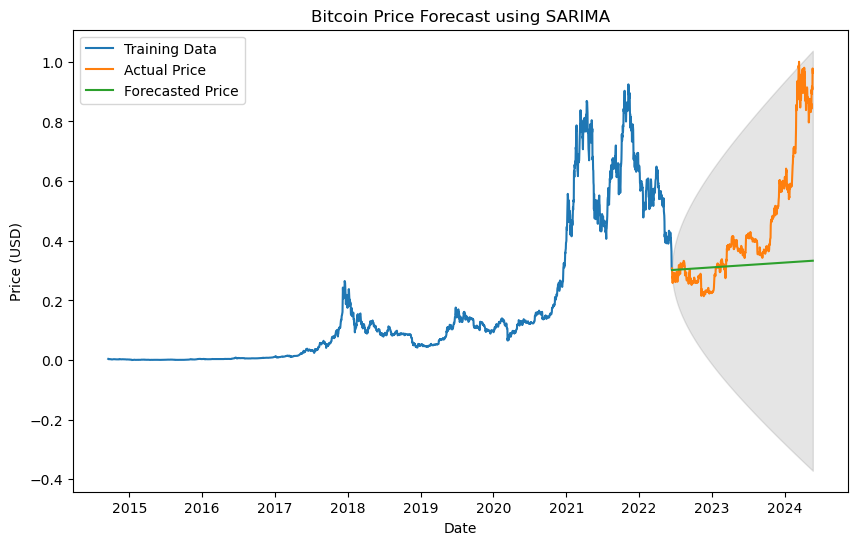

In [24]:
# Forecast the values
forecast4_result = sarima_model_fit.get_forecast(steps=len(test_scaled))
forecast4 = forecast4_result.predicted_mean
conf4_int = forecast4_result.conf_int()

# Create a series for the forecasted values
forecast4_series = pd.Series(forecast4, index=test_scaled.index)

# Plot the forecast against actual outcomes 
plt.figure(figsize=(10, 6))
plt.plot(train_scaled, label='Training Data')
plt.plot(test_scaled, label='Actual Price')
plt.plot(forecast4_series, label='Forecasted Price')
plt.fill_between(test_scaled.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)  # Confidence interval
plt.title('Bitcoin Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### Evaluasi MSE, RMSE, R2

In [25]:
# --- ARIMA----
#hitung MSE
mse = mean_squared_error(test_scaled, forecast3)
print(f'Mean Squared Error ARIMA: {mse}')

#hitung RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error ARIMA: {rmse}')

#hitung R2
r2 = r2_score(test_scaled, forecast3)
print(f'R-squared ARIMA: {r2 * 100:.2f}%')

#---SARIMA---
#hitung MSE
mse = mean_squared_error(test_scaled, forecast4)
print(f'Mean Squared Error SARIMA: {mse}')

#hitung RMSE
rmse = mse ** 0.5
print(f'Root Mean Squared Error SARIMA: {rmse}')

#hitung R2
r2 = r2_score(test_scaled, forecast4)
print(f'R-squared SARIMA: {r2 * 100:.2f}%')

Mean Squared Error ARIMA: 0.053123957159900585
Root Mean Squared Error ARIMA: 0.2304863491834182
R-squared ARIMA: -27.10%
Mean Squared Error SARIMA: 0.053123957159900585
Root Mean Squared Error SARIMA: 0.2304863491834182
R-squared SARIMA: -27.10%


### Prediksi dengan model terbaru untuk closing btc 2025

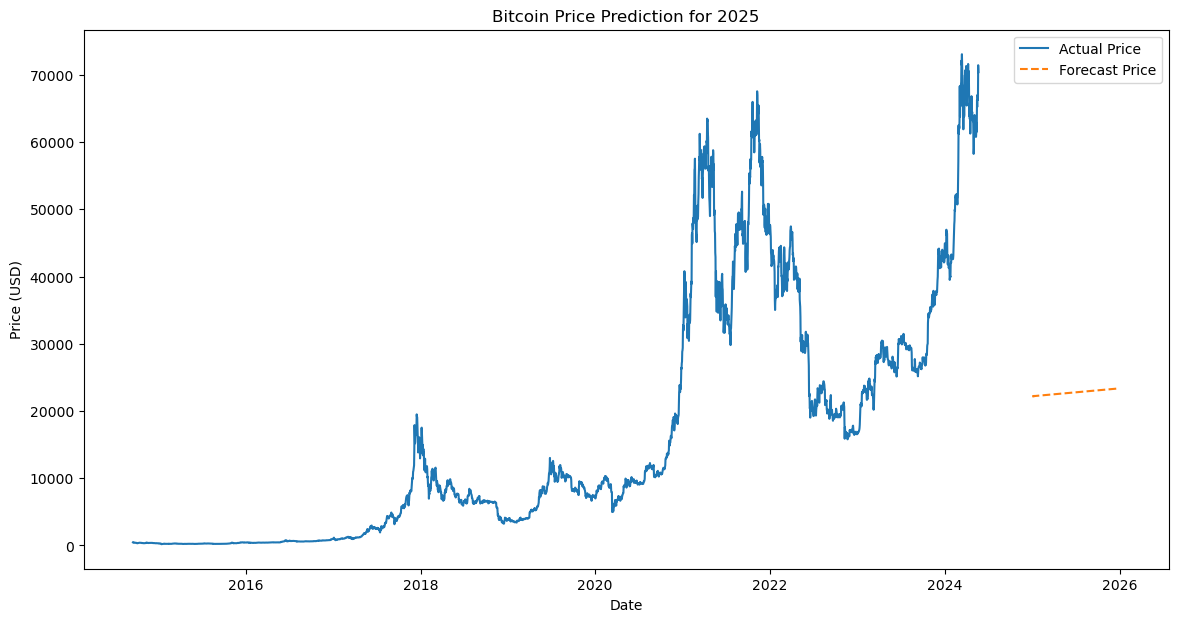

In [26]:
# Predict future prices using the best SARIMA model
pred_steps = 365
forecast_future = sarima_model_fit.get_forecast(steps=pred_steps)
forecast_index = pd.date_range(start='2025-01-01', periods=pred_steps, freq='D', tz=data.index.tz)
forecast_future_df = forecast_future.predicted_mean
forecast_future_df.index = forecast_index

# Inverse transform the forecasted values
forecast_future_df = pd.Series(scaler.inverse_transform(forecast_future_df.values.reshape(-1, 1)).flatten(), index=forecast_future_df.index)

# Combine forecast with actual data
full_data = pd.concat([data, forecast_future_df], axis=1)
full_data.columns = ['Actual', 'Forecast']

# Plot the forecast against actual outcomes
plt.figure(figsize=(14, 7))
plt.plot(full_data['Actual'], label='Actual Price')
plt.plot(full_data['Forecast'], label='Forecast Price', linestyle='--')
plt.title('Bitcoin Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [27]:
# Display forecasted prices
print(forecast_future_df)

2025-01-01 00:00:00+00:00    22192.431435
2025-01-02 00:00:00+00:00    22195.606723
2025-01-03 00:00:00+00:00    22212.753873
2025-01-04 00:00:00+00:00    22191.720096
2025-01-05 00:00:00+00:00    22226.105666
                                 ...     
2025-12-27 00:00:00+00:00    23350.862918
2025-12-28 00:00:00+00:00    23354.069886
2025-12-29 00:00:00+00:00    23357.276853
2025-12-30 00:00:00+00:00    23360.483820
2025-12-31 00:00:00+00:00    23363.690787
Freq: D, Length: 365, dtype: float64


# Analisis Hasil terhadap Algoritma Arima, Sarima 
### ARIMA
Model ARIMA(2, 2, 3): Mampu menangkap dinamika data harga Bitcoin yang bersifat non-stasioner dengan mengkombinasikan lima lag variabel autoregressive dan satu differencing.
Forecasting: Prediksi harga Bitcoin menggunakan ARIMA menunjukkan kesesuaian yang baik dengan data aktual, meskipun ada beberapa perbedaan yang mencerminkan volatilitas tinggi dari harga Bitcoin.

### SARIMA
Model SARIMA (0, 0, 0, 12) yang digunakan untuk memprediksi harga penutupan Bitcoin menunjukkan hasil yang sebagian besar koefisien autoregressive (AR) signifikan, namun koefisien moving average (MA) dan komponen musiman tidak signifikan. Pemodelan ulang dimulai dengan mencari parameter \( p, d, q, m \) terbaik untuk model SARIMA, melengkapi parameter non-musiman dari model ARIMA (2, 2, 3). Model SARIMA untuk prediksi harga penutupan Bitcoin menunjukkan bahwa koefisien autoregressive (AR) pada lag 1 dan 2 serta koefisien moving average (MA) pada lag 1, 2, dan 3 semuanya signifikan. Model ini memiliki 2828 observasi, dengan nilai AIC -17422.590 dan BIC -17386.911, mengindikasikan kualitas yang baik namun masih dapat ditingkatkan. Tes diagnostik menunjukkan residuals memiliki korelasi yang tersisa, tidak berdistribusi normal, dan menunjukkan heteroskedastisitas, mengindikasikan bahwa masih ada ruang untuk perbaikan model melalui penyesuaian parameter, eksplorasi model alternatif, atau transformasi data untuk meningkatkan akurasi prediksi.

## Kesimpulan
Dalam perbandingan antara model SARIMA dan ARIMA, keduanya menunjukkan nilai metrics evaluasi yang sama baik MSE, RMSE, hingga R-squared yang dihasilkan -27.10% menunjukkan bahwa model yang dibangun tidak optimal. Ada kecenderungan untuk overfitting atau underfitting karena data cryptocurrency yang begitu kompleks dengan volatilitas yang tinggi.

Untuk prediksi harga closing menggunakan model SARIMA sendiri menunjukkan adanya penurunan harga closing BTC pada tahun 2025. namun mengingat evaluasi metrik model yang belum optimal, dapat dieksplorasi lebih lanjut beberapa pendekatan lain, seperti pengaturan parameter yang lebih optimal, penggunaan data tambahan, atau mencoba model prediktif lain seperti model berbasis machine learning atau deep learning. 